# MLP with autograd for logistic regression

In [105]:
from math import *
w1=torch.randn([100,784], requires_grad=True, dtype=torch.float64)
w2=torch.randn([10,100], requires_grad=True, dtype=torch.float64)
b1=torch.zeros([100,1], requires_grad=True, dtype=torch.float64)
b2=torch.zeros([10,1], requires_grad=True,dtype=torch.float64)
with torch.no_grad():
    w1.mul(2/sqrt(100+784))
    w1.mul(2/sqrt(100+10))

- There was something about 'proper probabilities' in 'Learning form data'
- Rewrite the 1-layer and 2-layer network using the improvements form the experiments
- Reformulate as the final example in 'grundlagenfach' involving calculus, probabilities and vectors.
- What about HE initialization.

## Torch

In [23]:
!pip3 install torch

In [24]:
!pip3 install torchvision --no-deps

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

## Gradients

In [191]:
x=torch.tensor([3.0],requires_grad=True,dtype=torch.float64)
y=torch.tensor([-4.0],requires_grad=True,dtype=torch.float64)
x,y

(tensor([3.], dtype=torch.float64, requires_grad=True),
 tensor([-4.], dtype=torch.float64, requires_grad=True))

In [160]:
z=x**2+y**3
z.backward()

In [161]:
print(x.grad)
print(y.grad)

tensor([6.], dtype=torch.float64)
tensor([48.], dtype=torch.float64)


In [166]:
def func(y):
    if y >= 0: 
        return y
    else: 
        return 0

In [174]:
u=func(y)

In [194]:
u.backward()

AttributeError: 'int' object has no attribute 'backward'

In [192]:
relu = torch.nn.ReLU()

In [195]:
v=relu(y)

In [198]:
v.backward()

In [199]:
y.grad

tensor([0.], dtype=torch.float64)

In [348]:
import numpy as np
xc = np.linspace(-5, 5,50)
yc = np.linspace(-5, 5,50)

XC, YC = np.meshgrid(xc, yc)

def f(x,y):
    return 2*x**2+4*y**2

Z=f(*np.meshgrid(xc,yc))

x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))
u=4*x
v=8*y


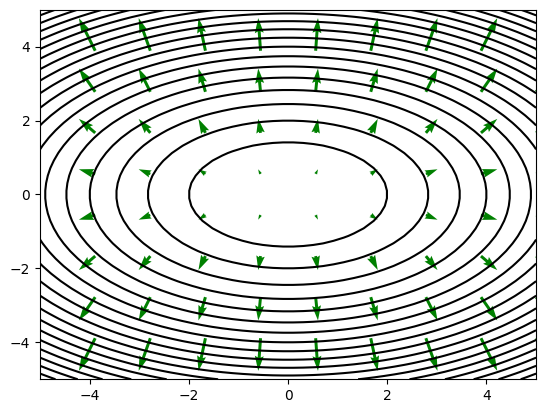

In [368]:
plt.contour(XC, YC, Z,20,colors='black')
plt.quiver(x, y, u, v, color='g')


## Data 

In [ ]:
train_data = torchvision.datasets.MNIST('./data',download=True)
test_data = torchvision.datasets.MNIST('data',train=False)
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test


In [23]:
image, label = train_data[0]
image,label

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [24]:
image

## Images to tensors

In [28]:
import torchvision.transforms as T

In [29]:
train_data = torchvision.datasets.MNIST('data',train=True,transform=T.ToTensor())
test_data = torchvision.datasets.MNIST('data',train=False,transform=T.ToTensor()) 

In [36]:
train_data[0][0].shape

torch.Size([1, 28, 28])

The Image is contained in an additional (unnecessary) list

In [328]:
train_data[0][0][0].flatten().shape

torch.Size([784])

Thats a row vector.

In [207]:
x_train=torch.zeros([60000, 784], dtype=torch.float64)
y_train=torch.zeros([60000, 1], dtype=torch.float64)

for i in range(60000):
    x_train[i]=train_data[i][0][0].flatten()
    y_train[i]=train_data[i][1]

x_test=torch.zeros([10000, 784], dtype=torch.float64)
y_test=torch.zeros([10000, 1], dtype=torch.float64)

for i in range(10000):
    x_test[i]=test_data[i][0][0].flatten()
    y_test[i]=test_data[i][1]

In [98]:
x_train[0].shape

torch.Size([784])

## 1 layer

In [99]:
w=torch.randn([10,784], requires_grad=True, dtype=torch.float64)
b=torch.randn([10,1], requires_grad=True, dtype=torch.float64)

In [100]:
b

tensor([[-0.7586],
        [ 0.2586],
        [-0.6915],
        [-0.3619],
        [-0.9173],
        [ 0.4195],
        [ 0.1175],
        [-1.4577],
        [ 0.3610],
        [-0.2595]], dtype=torch.float64, requires_grad=True)

In [102]:
def soft(y):
    return torch.exp(y)/torch.sum(torch.exp(y))
def forward1(w,b,x):
    return soft(torch.matmul(w,x.reshape([784,1]))+b)
    

In [101]:
lrate=0.001

for i in range(len(x_train[0:20])):
    loss=-torch.log(forward1(w,b,x_train[i])[int(y_train[i])])
    loss.backward()
    print(w.grad.max())
    with torch.no_grad():
        w-=lrate*w.grad
        b-=lrate*b.grad
        w.grad=None
        b.grad=None

tensor(0.9995, dtype=torch.float64)
tensor(0.9450, dtype=torch.float64)
tensor(0.9979, dtype=torch.float64)
tensor(0.5529, dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)
tensor(0.8070, dtype=torch.float64)
tensor(0.3911, dtype=torch.float64)
tensor(0.8332, dtype=torch.float64)
tensor(0.2122, dtype=torch.float64)
tensor(0.9588, dtype=torch.float64)
tensor(0.9337, dtype=torch.float64)
tensor(0.9502, dtype=torch.float64)
tensor(0.5180, dtype=torch.float64)
tensor(0.8882, dtype=torch.float64)
tensor(0.0065, dtype=torch.float64)
tensor(0.9381, dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)
tensor(0.6143, dtype=torch.float64)
tensor(0.4562, dtype=torch.float64)
tensor(0.9099, dtype=torch.float64)


In [103]:
lrate=0.001

for i in range(len(x_train)):
    loss=-torch.log(forward1(w,b,x_train[i])[int(y_train[i])])
    loss.backward()
    with torch.no_grad():
        w-=lrate*w.grad
        b-=lrate*b.grad
        w.grad=None
        b.grad=None

### In sample accuracy

In [104]:
c=0
for i in range(len(x_train)):
    if int(torch.argmax(forward1(w,b,x_train[i]))) ==  int(y_train[i]):
        c+=1
c/len(x_train)        
    

0.7588166666666667

### Out of sample accuracy

In [84]:
c=0
for i in range(len(x_test)):
    if int(torch.argmax(forward1(w,b,x_test[i]))) ==  int(y_test[i]):
        c+=1
c/len(x_test)        
    

0.765

## 2 layers

In [254]:
from math import *
w1=torch.randn([100,784], requires_grad=True, dtype=torch.float64)
w2=torch.randn([10,100], requires_grad=True, dtype=torch.float64)
b1=torch.zeros([100,1], requires_grad=True, dtype=torch.float64)
b2=torch.zeros([10,1], requires_grad=True,dtype=torch.float64)
with torch.no_grad():
    w1.mul(2/sqrt(100+784))
    w1.mul(2/sqrt(100+10))

In [255]:
def soft(y):
    return torch.exp(y)/torch.sum(torch.exp(y))

relu = torch.nn.ReLU()
def forward2(w1,b1,w2,b2,x):
    return soft(torch.matmul(w2,relu(torch.matmul(w1,x.reshape([784,1]))+b1))+b2)
    

In [256]:
lrate=0.001

for i in range(len(x_train)):
    loss=-torch.log(forward2(w1,b1,w2,b2,x_train[i])[int(y_train[i])])
    if not torch.isnan(loss):
        loss.backward()
        with torch.no_grad():
            w1-=lrate*w1.grad
            b1-=lrate*b1.grad
            w2-=lrate*w2.grad
            b2-=lrate*b2.grad
            w1.grad=None
            b1.grad=None
            w2.grad=None
            b2.grad=None
    else: raise Exception("NaN")

### In sample accuracy

In [257]:
c=0
for i in range(len(x_train)):
    if int(torch.argmax(forward2(w1,b1,w2,b2,x_train[i]))) ==  int(y_train[i]):
        c+=1
c/len(x_train)        
    

0.8631833333333333

### Out of sample accuracy

In [110]:
c=0
for i in range(len(x_test)):
    if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
        c+=1
c/len(x_test)        
    

0.8751

## Only digits  0-5

In [258]:

lrate=0.001

for i in range(len(x_train)):
    if int(y_train[i])<=5:
        loss=cross_entropy_loss(forward2(w1,b1,w2,b2,x_train[i]),int(y_train[i]))
        if not torch.isnan(loss):
            loss.backward()
            with torch.no_grad():
                w1-=lrate*w1.grad
                b1-=lrate*b1.grad
                w2-=lrate*w2.grad
                b2-=lrate*b2.grad
                w1.grad=None
                b1.grad=None
                w2.grad=None
                b2.grad=None
        else: raise Exception("NaN")

### Out of sample accuracy

In [259]:
c=0
s=0
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
            c+=1
c/s        
    

0.9331785773503565

### Failures

In [133]:
failures = []
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) !=  int(y_test[i]):
            failures.append(i)

In [134]:
len(failures)

498

In [144]:
train_data_org = torchvision.datasets.MNIST('./data',download=True)
test_data_org = torchvision.datasets.MNIST('data',train=False)


In [147]:
test_data_org[0]

(<PIL.Image.Image image mode=L size=28x28>, 7)

5


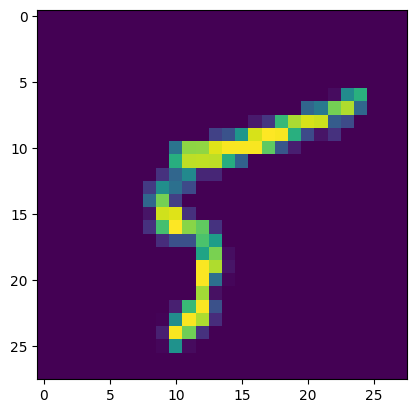

In [158]:
i=7
plt.imshow(test_data_org[failures[i]][0])
print(test_data_org[failures[i]][1])

## Batching

In [260]:
lrate=0.001

for i in range(len(x_train)):
    loss=-torch.log(forward2(w1,b1,w2,b2,x_train[i])[int(y_train[i])])
    if not torch.isnan(loss):
        loss.backward()
        with torch.no_grad():
            if i % 32 == 0:  # Batching?
                w1-=lrate*w1.grad
                b1-=lrate*b1.grad
                w2-=lrate*w2.grad
                b2-=lrate*b2.grad
                w1.grad=None
                b1.grad=None
                w2.grad=None
                b2.grad=None
    else: raise Exception("NaN")

In [ ]:
c=0
s=0
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
            c+=1
c/s        
    

0.8973636212900017

## Cross entropy loss

In [282]:
def forward2(w1,b1,w2,b2,x):
    return torch.matmul(w2,relu(torch.matmul(w1,x.reshape([784,1]))+b1))+b2
    
def cross_entropy_loss(output, ind):
    logsoft = output-torch.log(torch.sum(torch.exp(output)))
    return -logsoft[ind]

In [264]:
lrate=0.001

for i in range(len(x_train)):
    loss=cross_entropy_loss(forward2(w1,b1,w2,b2,x_train[i]),int(y_train[i]))
    if not torch.isnan(loss):
        loss.backward()
        with torch.no_grad():
            w1-=lrate*w1.grad
            b1-=lrate*b1.grad
            w2-=lrate*w2.grad
            b2-=lrate*b2.grad
            w1.grad=None
            b1.grad=None
            w2.grad=None
            b2.grad=None
    else: raise Exception("NaN")

In [265]:
c=0
s=0
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
            c+=1
c/s        
    

0.9010114408887415

## Learning rate

In [284]:
lrate=0.0001

for i in range(len(x_train)):
    loss=cross_entropy_loss(forward2(w1,b1,w2,b2,x_train[i]),int(y_train[i]))
    if not torch.isnan(loss):
        loss.backward()
        with torch.no_grad():
            w1-=lrate*w1.grad
            b1-=lrate*b1.grad
            w2-=lrate*w2.grad
            b2-=lrate*b2.grad
            w1.grad=None
            b1.grad=None
            w2.grad=None
            b2.grad=None
    else: raise Exception("NaN")

In [267]:
c=0
s=0
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
            c+=1
c/s        
    

0.9088045100315039

## Stochastic gradient descent

In [268]:
import random as rd

In [272]:
order = list(range(len(x_test)))

In [273]:
rd.shuffle(order)

In [319]:
from math import *
w1=torch.randn([100,784], requires_grad=True, dtype=torch.float64)
w2=torch.randn([10,100], requires_grad=True, dtype=torch.float64)
b1=torch.zeros([100,1], requires_grad=True, dtype=torch.float64)
b2=torch.zeros([10,1], requires_grad=True,dtype=torch.float64)
with torch.no_grad():
    w1.mul(2/sqrt(100+784))
    w1.mul(2/sqrt(100+10))

In [320]:
lrate=0.001
for j in range(50):
    rd.shuffle(order)
    for i in order:
        if int(y_train[i])<=5:
            loss=cross_entropy_loss(forward2(w1,b1,w2,b2,x_train[i]),int(y_train[i]))
            if not torch.isnan(loss):
                loss.backward()
                if i % 32 == 0: 
                    with torch.no_grad():
                        w1-=lrate*w1.grad
                        b1-=lrate*b1.grad
                        w2-=lrate*w2.grad
                        b2-=lrate*b2.grad
                        w1.grad=None
                        b1.grad=None
                        w2.grad=None
                        b2.grad=None
            else: raise Exception("NaN")

In [323]:
c=0
s=0
for i in range(len(x_train)):
    if int(y_train[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_train[i]))) ==  int(y_train[i]):
            c+=1
c/s        
    

0.9352527972901685

In [321]:
c=0
s=0
for i in range(len(x_test)):
    if int(y_test[i])<=5:
        s+=1
        if int(torch.argmax(forward2(w1,b1,w2,b2,x_test[i]))) ==  int(y_test[i]):
            c+=1
c/s        
    

0.9305256176421821